In [3]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt
from stable_diffusion import StableDiffusion

def plot_images(images):
    plt.figure(figsize=(30, 30))
    for i in range(len(images)):
        ax = plt.subplot(int(len(images)/2), 2, i+1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

In [4]:
model = StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


10/10 [==============================] - 14s 409ms/step


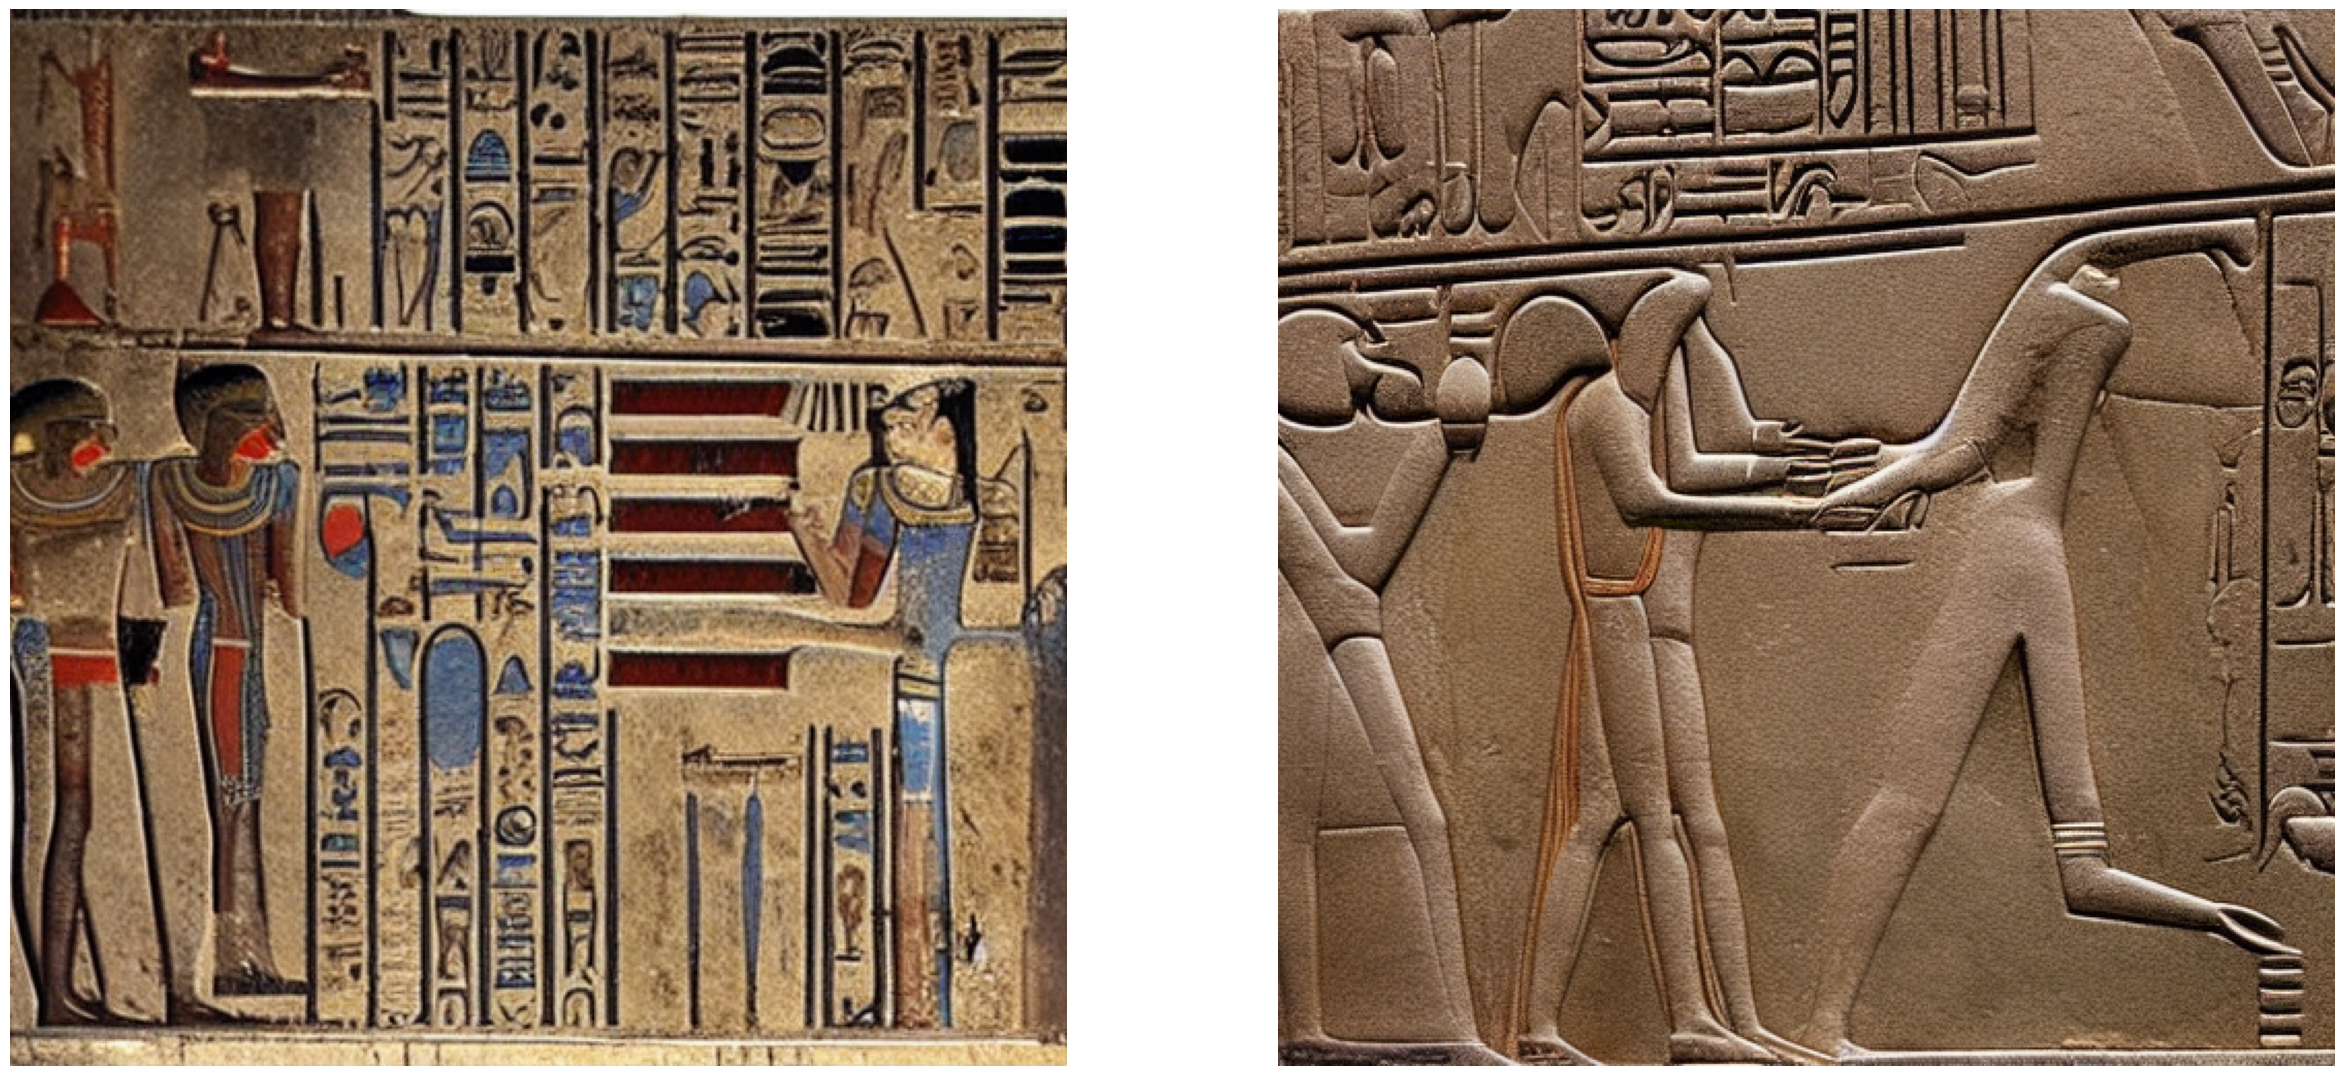

In [5]:
images = model.text_to_image("your girlfriend is breaking up with you, Egyptian hieroglyphs", batch_size=2, num_steps=10)
plot_images(images)

In [ ]:
def load_learned_embed_in_clip(learned_embeds_path, text_encoder, tokenizer, token=None):
  loaded_learned_embeds = torch.load(learned_embeds_path, map_location="cpu")
  
  # separate token and the embeds
  trained_token = list(loaded_learned_embeds.keys())[0]
  embeds = loaded_learned_embeds[trained_token]

  # cast to dtype of text_encoder
  dtype = text_encoder.get_input_embeddings().weight.dtype
  embeds.to(dtype)

  # add the token in tokenizer
  token = token if token is not None else trained_token
  num_added_tokens = tokenizer.add_tokens(token)
  if num_added_tokens == 0:
    raise ValueError(f"The tokenizer already contains the token {token}. Please pass a different `token` that is not already in the tokenizer.")
  
  # resize the token embeddings
  text_encoder.resize_token_embeddings(len(tokenizer))
  
  # get the id for the token and assign the embeds
  token_id = tokenizer.convert_tokens_to_ids(token)
  text_encoder.get_input_embeddings().weight.data[token_id] = embeds

  print(trained_token)